In [11]:
## Chamando bibliotecas

import numpy as np # type: ignore
import pandas as pd # type: ignore
from scipy.special import jv # type: ignore
import matplotlib.pyplot as plt # type: ignore
from iminuit import Minuit # type: ignore
from iminuit.cost import LeastSquares # type: ignore
from scipy.optimize import differential_evolution


In [12]:
## Definindo as funções de seção de choque total, rho

def sigPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    s_bar = -1j*s
    

    f_h = s*1j*(h1*np.log(s_bar)**2 + h2*np.log(s_bar)+ h3)
    f_p = s*(CP*(1j))
    f_pp = s*(CPP*1j/np.log(s_bar))
    f_r = s*CRP*(1j-1/np.tan(np.pi/2 * arP))*s**(arP-1)

    f_mo = s*(o1*(np.log(s_bar)**2) + o2*np.log(s_bar) + o3)
    f_op = s*COP/np.log(s_bar)
    f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)

    F = 0.389379323/(s) * ((f_h.imag +f_p.imag +f_pp.imag +f_r.imag ) + (f_mo.imag +f_op.imag +f_rm.imag ))
    return(F)
    
def sigPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    s_bar = -1j*s
    

    f_h = s*1j*(h1*np.log(s_bar)**2 + h2*np.log(s_bar)+ h3)
    f_p = s*(CP*(1j - 1/np.tan(np.pi/2)))
    f_pp = s*(CPP*1j/np.log(s_bar))
    f_r = s*CRP*(1j-1/np.tan(np.pi/2 * arP))*s**(arP-1)

    f_mo = s*(o1*(np.log(s_bar)**2) + o2*np.log(s_bar) + o3)
    f_op = s*COP/np.log(s_bar)
    f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)

    F = 0.389379323/(s) * ((f_h.imag +f_p.imag +f_pp.imag +f_r.imag ) - (f_mo.imag +f_op.imag +f_rm.imag ))
    return(F)

def rhoPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    s_bar = -1j*s
    

    f_h = s*1j*(h1*np.log(s_bar)**2 + h2*np.log(s_bar)+ h3)
    f_p = s*(CP*(1j - 1/np.tan(np.pi/2)))
    f_pp = s*(CPP*1j/np.log(s_bar))
    f_r = s*CRP*(1j-1/np.tan(np.pi/2 * arP))*s**(arP-1)

    f_mo = s*(o1*(np.log(s_bar)**2) + o2*np.log(s_bar) + o3)
    f_op = s*COP/np.log(s_bar)
    f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)

    #F = 0.389379323*((f_h+f_p+f_pp+f_r) + (f_mo+f_op+f_rm))
    FI = (f_h.imag +f_p.imag +f_pp.imag +f_r.imag ) + (f_mo.imag +f_op.imag +f_rm.imag)
    FR = (f_h.real +f_p.real +f_pp.real +f_r.real ) + (f_mo.real +f_op.real +f_rm.real)

    rho = FR/FI
    return(rho)


def rhoPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM):

    s = sqrt_s**2
    s_bar = -1j*s
    

    f_h = s*1j*(h1*np.log(s_bar)**2 + h2*np.log(s_bar)+ h3)
    f_p = s*(CP*(1j - 1/np.tan(np.pi/2)))
    f_pp = s*(CPP*1j/np.log(s_bar))
    f_r = s*CRP*(1j-1/np.tan(np.pi/2 * arP))*s**(arP-1)

    f_mo = s*(o1*(np.log(s_bar)**2) + o2*np.log(s_bar) + o3)
    f_op = s*COP/np.log(s_bar)
    f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)

    FI = (f_h.imag +f_p.imag +f_pp.imag +f_r.imag ) - (f_mo.imag +f_op.imag +f_rm.imag)
    FR = (f_h.real +f_p.real +f_pp.real +f_r.real ) - (f_mo.real +f_op.real +f_rm.real)

    rho = FR/FI
    return(rho)
    


In [13]:
# Definido as funções da seção de choque diferencial para 7, 8 e 13 TeV
def F7(q2, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    t = -q2
    s = 7000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (-t/t0)**(1/2) * np.log(s_bar)
    
    
    traj_plus = arP + 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM + 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = 1 + 0.25*t
    alphaPP = 1 + t*0.25/2
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = 1 + arOL*t
    alphaOP = 1 + t*arOL*0.25/(arOL+0.25)
    alphaRPM = aRPM + 0.88*0.25/(0.88+0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s_bar)
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaRP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1j*np.pi/2))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1j*np.pi/2))

    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM))**2
    return(f.real)
def F8(q2, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    t=-q2
    s = 8000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (-t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = arP + 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM + 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = alpha0P + 0.25*t
    alphaPP = alpha0P + t*0.25/2
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = alpha0P + arOL*t
    alphaOP = alpha0P + t*arOL*0.25/(arOL+0.25)
    alphaRPM = aRPM + 0.88*0.25/(0.88+0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*(CRP*gama1*np.exp(betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1))
    fr_m = -s*(CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1))
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPP = s*(t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaRP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1j*np.pi/2)))

    f_o = s*(CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO))
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1j*np.pi/2))

    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM))**2
    return(f.real)

def F13(q2, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    t = -q2
    s = 13000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (-t/t0)**(1/2) * np.log(s_bar)
    alpha0P = 1
    
    traj_plus = arP + 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM + 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = alpha0P + 0.25*t
    alphaPP = alpha0P + t*0.25/2
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = alpha0P + arOL*t
    alphaOP = alpha0P + t*arOL*0.25/(arOL+0.25)
    alphaRPM = aRPM + 0.88*0.25/(0.88+0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaRP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1j*np.pi/2))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1j*np.pi/2))

    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM))**2

    return(f.real)

In [14]:
## Separando os dados para o ensemble TOTEM (Atualizar as delimitações)

dat = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True)
x_values = []
y_values = []
yerr_values = []

for i in range(0, len(dat)):

    if i==79: #sig_pp 0 
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, nrows=79)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==80: #sig_ppbar 1
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=30)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==111: #rho_pp 2
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=52)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==164: #rho_ppbar 3
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=12)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==177: #dsig 7000 4
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=41)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==219: #dsig 8000 5
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=30)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c)
    if i==250: #dsig 13000 6
        df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i)
        a = df['X'].to_numpy()
        b = df['Y'].to_numpy()
        c = df['DY'].to_numpy()
        x_values.append(a)
        y_values.append(b)
        yerr_values.append(c) 
    
    
    i =+ 1    

/tmp/ipykernel_703272/217728775.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True)
/tmp/ipykernel_703272/217728775.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, nrows=79)
/tmp/ipykernel_703272/217728775.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('ens_totem_new_cut0_1_completo.dat', delim_whitespace=True, skiprows=i, nrows=30)
/tmp/ipykernel_703272/217728775.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = 

In [15]:
## Fazendo ajustes para o melhor chute inicial

x0 = x_values[0]
x1 = x_values[1]
x2 = x_values[2]
x3 = x_values[3]
x4 = x_values[4]
x5 = x_values[5]
x6 = x_values[6]


y0 = y_values[0]
y1 = y_values[1]
y2 = y_values[2]
y3 = y_values[3]
y4 = y_values[4]
y5 = y_values[5]
y6 = y_values[6]

def error(params):
    h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM = params

    j0 = y0 + yerr_values[0]
    j1 = y1 + yerr_values[1]
    j2 = y2 + yerr_values[2]
    j3 = y3 + yerr_values[3]
    j4 = y4 + yerr_values[4]
    j5 = y5 + yerr_values[5]
    j6 = y6 + yerr_values[6]

    r0 = j0 - sigPP(x0, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r1 = j1 - sigPP_bar(x1, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r2 = j2 - rhoPP(x2, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r3 = j3 - rhoPP_bar(x3, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r4 = j4 - F7(x4, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
    r5 = j5 - F8(x5, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
    r6 = j6 - F13(x6, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
    
    total = np.sum(r0**2) + np.sum(r1**2) + np.sum(r2**2) + np.sum(r3**2) + np.sum(r4**2) + np.sum(r5**2) + np.sum(r6**2)
    return total

# Bounds escolhidos são o intervalo de 60% menos e 60% mais dos parametros do artigo original

bounds = [
    (0.1612, 0.6448),
    (-6.1786, -1.5446),
    (3.6832, 14.7326),
    (1.8276, 7.3106),
    (2.8719, 11.4877),
    (2.4108, 9.6432),
    (3.5810, 14.3242),
    (1.3806, 5.5224),
    (0.4426, 1.7702),
    (0.2628, 1.0514),
    (0.0507, 0.2027),
    (0.0278, 0.1114),
    (-2.2666, -0.5666),
    (0.1423, 0.5693),
    (0.192, 0.768),
    (0.136, 0.544),
    (-0.896, -0.224),
    (0.228, 0.912),
    (0.280, 1.120),
    (16.172, 64.688),
    (3.680, 14.720),
    (4.732, 18.928),
    (15.272, 61.088),
    (18.836, 75.344),
    (-3088.16, -772.04),
    (3.092, 12.368),
    (3437.08, 13748.32),
    (1.748, 6.992),
    (0.012, 0.048),
    (13.440, 53.760),
    (0.780, 3.120),
    (0.316, 1.264),
    (2.132, 8.528),
    (0.692, 2.768),
    (2.932, 11.728)



]




In [16]:
## Calculando melhor chute inicial

# Tempo médio de cálculo: 4.9 min

init_chute = differential_evolution(error, bounds, strategy='best1bin', maxiter=1000, popsize=15, tol=1e-6, mutation=(0.5, 1), recombination=0.7, seed=42)
print(init_chute)

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 12409.77524617091
                   x: [ 6.448e-01 -1.545e+00 ...  1.897e+00  9.539e+00]
                 nit: 1000
                nfev: 528441
          population: [[ 6.448e-01 -1.545e+00 ...  1.932e+00  9.538e+00]
                       [ 6.448e-01 -1.545e+00 ...  1.550e+00  7.620e+00]
                       ...
                       [ 6.448e-01 -1.545e+00 ...  1.616e+00  4.647e+00]
                       [ 6.448e-01 -1.545e+00 ...  1.128e+00  6.351e+00]]
 population_energies: [ 1.241e+04  1.248e+04 ...  1.254e+04  1.250e+04]
                 jac: [-5.383e+05 -2.473e+04 ...  1.824e+00 -8.731e-03]


In [17]:
## Minimiação de Chi quadrado com cl=90%, usando a biblioteca do Minuit

# Tempo médio de cálculo: 2.4 min

lsq0 = LeastSquares(x_values[0], y_values[0], yerr_values[0], sigPP)
lsq1 = LeastSquares(x_values[1], y_values[1], yerr_values[1], sigPP_bar)
lsq2 = LeastSquares(x_values[2], y_values[2], yerr_values[2], rhoPP)
lsq3 = LeastSquares(x_values[3], y_values[3], yerr_values[3], rhoPP_bar)
lsq4 = LeastSquares(x_values[4], y_values[4], yerr_values[4], F7)
lsq5 = LeastSquares(x_values[5], y_values[5], yerr_values[5], F8)
lsq6 = LeastSquares(x_values[6], y_values[6], yerr_values[6], F13)

lsqT = lsq0 + lsq1 + lsq2 + lsq3 + lsq4 + lsq5 + lsq6

m = Minuit(lsqT, h1=init_chute.x[0], h2=init_chute.x[1], h3=init_chute.x[2], b1P=init_chute.x[3], b2P=init_chute.x[4], b3P=init_chute.x[5], b1M=init_chute.x[6], b2M=init_chute.x[7], b3M=init_chute.x[8], kP=init_chute.x[9], kM=init_chute.x[10], o1=init_chute.x[11], o2=init_chute.x[12], o3=init_chute.x[13],  arP=init_chute.x[14], arM=init_chute.x[15], arPP=init_chute.x[16], arOL=init_chute.x[17], aRPM=init_chute.x[18], CP=init_chute.x[19], CPP=init_chute.x[20], COP=init_chute.x[21], CRP=init_chute.x[22], CRM=init_chute.x[23], CRPP=init_chute.x[24], CO=init_chute.x[25], CRPM=init_chute.x[26], betaP=init_chute.x[27], betaRP=init_chute.x[28], betaRM=init_chute.x[29], betaPP=init_chute.x[30], betaRPP=init_chute.x[31], betaO=init_chute.x[32], betaOP=init_chute.x[33], betaRPM=init_chute.x[34])
m.errordef=4
m.tol = 1
m.simplex()
m.migrad()
#m.minos(cl=0.9)

## FCN / Numero de dados = 0.5


/home/iser/anaconda3/lib/python3.12/site-packages/iminuit/minuit.py:139: ErrordefAlreadySetWarning: cost function has an errordef attribute equal to 1.0, you should not override this with Minuit.errordef
  warnings.warn(msg, ErrordefAlreadySetWarning)
/tmp/ipykernel_703272/2937027379.py:16: RuntimeWarning: overflow encountered in power
  f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)
/tmp/ipykernel_703272/2937027379.py:34: RuntimeWarning: overflow encountered in power
  f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)
/tmp/ipykernel_703272/2937027379.py:52: RuntimeWarning: overflow encountered in power
  f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)
/tmp/ipykernel_703272/2937027379.py:58: RuntimeWarning: invalid value encountered in divide
  rho = FR/FI
/tmp/ipykernel_703272/2937027379.py:75: RuntimeWarning: overflow encountered in power
  f_rm = -s*CRM*(1j- np.tan(np.pi/2*arM))*s**(arM-1)
/tmp/ipykernel_703272/2937027379.py:80: RuntimeWarning: invalid value encountered in d

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 190.8                      │             Nfcn = 15586             │
│ EDM = 1.03 (Goal: 0.008)         │           time = 12.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h1      │  0.6641   │  0.0030   │            │            │         │         │       │
│ 1 │ h2      │   -1.65   │   0.05    │            │            │         │         │       │
│ 2 │ h3      │   11.53   │   0.10    │            │            │         │         │       │
│ 3 │ o1      │  -0.014   │   0.004   │            │            │         │         │       │
│ 4 │ o2      │   -1.01   │   0.06    │            │            │         │         │       │
│ 5 │ o3      │    8.1    │    0.8    │            │            │         │         │       │
│ 6 │ arP     │   0.626   │   0.011   │            │            │         │         │       │
│ 7 │ arM     │   0.988   │   0.008   │            │            │         │         │       │
│ 8 │ CP      │   60.2    │    0.4    │            │            │         │         │       │
│ 9 │ CPP     │    56     │     4     │            │            │         │         │       │
│ 10│ COP     │   -122    │     6     │            │            │         │         │       │
│ 11│ CRP     │   99.8    │    3.0    │            │            │         │         │       │
│ 12│ CRM     │   0.32    │   0.23    │            │            │         │         │       │
│ 13│ b1P     │   1.52    │   0.05    │            │            │         │         │       │
│ 14│ b2P     │   11.2    │    0.9    │            │            │         │         │       │
│ 15│ b3P     │   9.21    │   0.16    │            │            │         │         │       │
│ 16│ b1M     │   9.29    │   0.13    │            │            │         │         │       │
│ 17│ b2M     │    1.8    │    0.7    │            │            │         │         │       │
│ 18│ b3M     │   -31.3   │    2.7    │            │            │         │         │       │
│ 19│ kP      │  0.3823   │  0.0017   │            │            │         │         │       │
│ 20│ kM      │   -0.56   │   0.04    │            │            │         │         │       │
│ 21│ arPP    │   -30.6   │    1.2    │            │            │         │         │       │
│ 22│ arOL    │   -0.07   │   0.08    │            │            │         │         │       │
│ 23│ aRPM    │   0.94    │   0.08    │            │            │         │         │       │
│ 24│ CRPP    │   162e6   │   10e6    │            │            │         │         │       │
│ 25│ CO      │    -35    │     8     │            │            │         │         │       │
│ 26│ CRPM    │  21.9e6   │   1.3e6   │            │            │         │         │       │
│ 27│ betaP   │   12.1    │    0.5    │            │            │         │         │       │
│ 28│ betaRP  │    224    │    32     │            │            │         │         │       │
│ 29│ betaRM  │  0.90e6   │  0.04e6   │            │            │         │     

In [18]:
print(m.fval, m.ndof)

print(m.fval/m.ndof)

190.83795020890332 323.0
0.5908295672102271


In [19]:
print(m.values[0])

0.6640967955091985


In [20]:
## Determino o valor para cada parâmetro

h1 = m.values["h1"]
h2 = m.values['h2']
h3 = m.values['h3']
b1P = m.values['b1P']
b2P = m.values['b2P']
b3P = m.values['b3P']
b1M = m.values['b1M']
b2M = m.values['b2M']
b3M = m.values['b3M']
kP = m.values['kP']
kM = m.values['kM']
o1 = m.values['o1']
o2 = m.values['o2']
o3 = m.values['o3']
arP = m.values['arP']
arM = m.values['arM']
arPP = m.values['arPP']
arOL = m.values['arOL']
aRPM = m.values['aRPM']
CP = m.values['CP']
CPP = m.values['CPP']
COP = m.values['COP']
CRP = m.values['CRP']
CRM = m.values['CRM']
CRPP = m.values['CRPP']
CO = m.values['CO']
CRPM = m.values['CRPP']
betaP = m.values['betaP']
betaRP = m.values['betaRP']
betaRM = m.values['betaRM']
betaPP = m.values['betaPP']
betaRPP = m.values['betaRPP']
betaO = m.values['betaO']
betaOP = m.values['betaOP']
betaRPM = m.values['betaRPM']

sqrt_s = np.linspace(10, 10**4+4000, 10000)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_703272/1701818586.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{s}$ (GeV)')
/tmp/ipykernel_703272/1701818586.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{tot}$ (mb)')


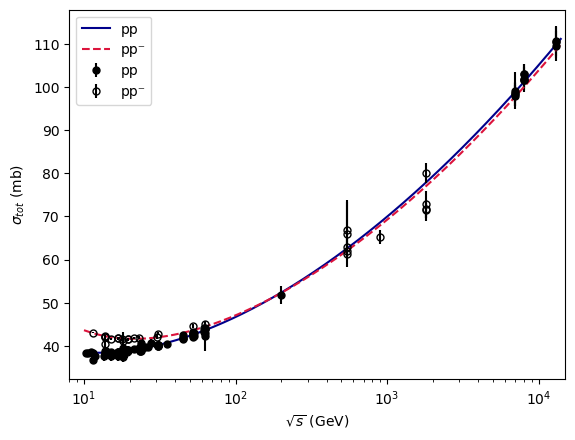

In [21]:
## Criando gráfico da seção de choque total pp e pp-

pp = sigPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)
pp_bar = sigPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)

plt.plot(sqrt_s, pp, label='pp', color='darkblue')
plt.errorbar(x_values[0], y_values[0], yerr_values[0], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.plot(sqrt_s,pp_bar, label='pp⁻', color='crimson', linestyle='--')
plt.errorbar(x_values[1], y_values[1], yerr_values[1], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xlim(8, 15000)
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('$\sigma_{tot}$ (mb)')
plt.savefig('1')
plt.legend()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_703272/3859755604.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{s}$ (GeV)')


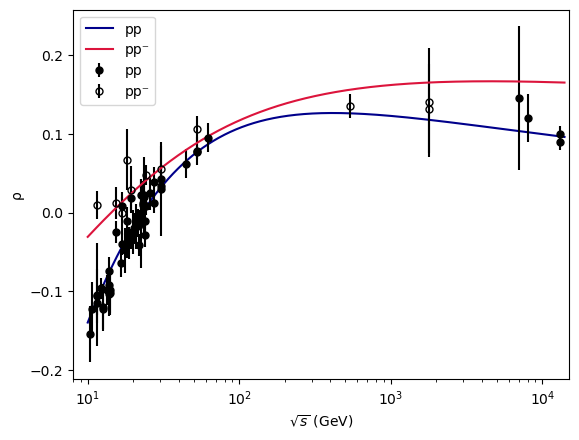

In [22]:
## Criando gráfico para o rho pp e pp-

rho_pp = rhoPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)
rho_pp_bar = rhoPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)

plt.plot(sqrt_s, rho_pp, color='darkblue', label='pp')
plt.errorbar(x_values[2], y_values[2], yerr_values[2], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[3], y_values[3], yerr_values[3], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.plot(sqrt_s, rho_pp_bar, color='crimson', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('ρ')
plt.legend()
plt.savefig('2')
plt.xlim(8, 15000)
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_703272/3554676328.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$d\sigma/dt$ (mb/GeV²)')


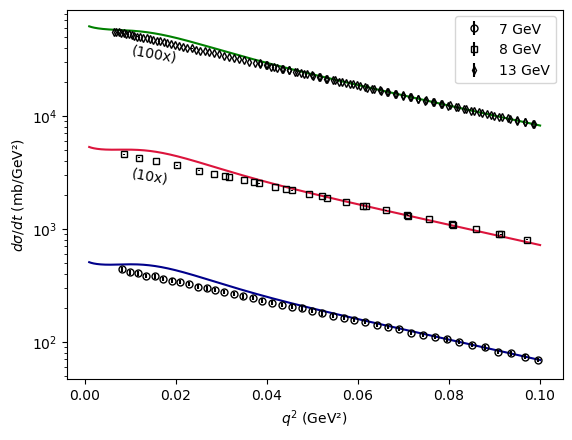

In [23]:
## Criando gráfico para a seção de choque diferencial a 7, 8 e 13 Tev

t = np.linspace(0.001, 0.1, 10000)

sig7 = F7(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
sig8 = F8(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
sig13 = F13(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)


plt.plot(t, sig7, color='darkblue')
plt.plot(t, 10*sig8, color='crimson')
plt.text(0.01, 10**3+1500, '(10x)', rotation=350)
plt.text(0.01, 10**4+20000, '(100x)', rotation=350)
plt.plot(t, 100*sig13, color='green')
plt.errorbar(x_values[4], y_values[4], yerr_values[4], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='7 GeV')
plt.errorbar(x_values[5], 10*y_values[5], yerr_values[5], fmt='s', markersize=5, mec='black', mfc='none', color='black', label='8 GeV')
plt.errorbar(x_values[6], 100*y_values[6], yerr_values[6], fmt='d', markersize=4, mec='black', mfc='none', color='black', label='13 GeV')
plt.yscale('log')
#plt.xlim(0.005, 0.104)
plt.xlabel('$q^2$ (GeV²) ')
plt.ylabel('$d\sigma/dt$ (mb/GeV²)')
plt.savefig('3')
plt.legend(loc='best')
plt.show()

In [24]:
# Definido as funções da seção de choque diferencial para 7, 8 e 13 TeV
def FC7(q2, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    t = -q2
    s = 7000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (-t/t0)**(1/2) * np.log(s_bar)
    kappa = -1
    gama = 0.55
    B = 19.89
    proj_square = 0.71 
    a0 = 1/137.03599911
    m_e = 0.510998918

    
    
    traj_plus = arP + 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM + 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = 1 + 0.25*t
    alphaPP = 1 + t*0.25/2
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = 1 + arOL*t
    alphaOP = 1 + t*arOL*0.25/(arOL+0.25)
    alphaRPM = aRPM + 0.88*0.25/(0.88+0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s_bar)
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaRP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1j*np.pi/2))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1j*np.pi/2))

    phi = kappa*(gama + np.log(B*np.abs(t)/2) + np.log(1 + 8/(B*proj_square)) + 4*np.abs(t)*np.log(proj_square/(4*abs(t)))/proj_square - 2*np.abs(t)/proj_square)
    alpha = a0/(1 - a0/(3 * np.pi)*np.log((q2 + m_e**2)/m_e**2))
    G = (proj_square/(proj_square + q2))**2
    FC = kappa*s*2*alpha*G**2/abs(t)


    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM+np.exp(alpha*phi*1j)*FC))**2
    return(f.real)
def FC8(q2, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    t = -q2
    s = 7000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (-t/t0)**(1/2) * np.log(s_bar)
    kappa = -1
    gama = 0.55
    B = 19.90
    proj_square = 0.71 
    a0 = 1/137.03599911
    m_e = 0.510998918

    
    
    traj_plus = arP + 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM + 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = 1 + 0.25*t
    alphaPP = 1 + t*0.25/2
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = 1 + arOL*t
    alphaOP = 1 + t*arOL*0.25/(arOL+0.25)
    alphaRPM = aRPM + 0.88*0.25/(0.88+0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s_bar)
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaRP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1j*np.pi/2))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1j*np.pi/2))

    phi = kappa*(gama + np.log(B*np.abs(t)/2) + np.log(1 + 8/(B*proj_square)) + 4*np.abs(t)*np.log(proj_square/(4*abs(t)))/proj_square - 2*np.abs(t)/proj_square)
    alpha = a0/(1 - a0/(3 * np.pi)*np.log((q2 + m_e**2)/m_e**2))
    G = (proj_square/(proj_square + q2))**2
    FC = kappa*s*2*alpha*G**2/abs(t)


    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM+np.exp(alpha*phi*1j)*FC))**2
    return(f.real)

def FC13(q2, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM):
    t = -q2
    s = 7000**2
    s0 = 1
    s_bar = -1j*s
    t0 = 1
    tau = (-t/t0)**(1/2) * np.log(s_bar)
    kappa = -1
    gama = 0.55
    B = 20.40
    proj_square = 0.71 
    a0 = 1/137.03599911
    m_e = 0.510998918

    
    
    traj_plus = arP + 0.88*t
    gama1 = (traj_plus*(traj_plus+1)*(traj_plus+2))/(arP*(arP+1)*(arP+2))    
    traj_min = arM + 0.88*t
    gama2 = (traj_min*(traj_min+1)*(traj_min+2))/(arM*(arM+1)*(arM+2))
    alphaP = 1 + 0.25*t
    alphaPP = 1 + t*0.25/2
    alphaRP = arPP + 0.88*0.25/(0.88+0.25)*t
    alphaO = 1 + arOL*t
    alphaOP = 1 + t*arOL*0.25/(arOL+0.25)
    alphaRPM = aRPM + 0.88*0.25/(0.88+0.25)*t

    p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
    p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
    p3 = h3*(jv(0,kP*tau,out=None) - kP*tau*jv(1,kP*tau,out=None))*np.exp(-b3P*t)    
    fh = 1j*s*(p1+p2+p3)
    p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
    p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
    p6 = o3*np.exp(-b3M*t)
    fmo = s*(p4+p5+p6)
    
    fp_p = s*(CP*np.exp(betaP*t)*(1j - 1/np.tan(np.pi/2 * alphaP))*s**(alphaP-1))
    fr_p = s*CRP*gama1*np.exp(betaRP*t)*(1j - 1/np.tan(np.pi/2 * traj_plus))*s**(traj_plus - 1)
    fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
    f_pp = s*(CPP*np.exp(betaPP*t))*(1j*np.sin(np.pi/2 * alphaPP)-np.cos(np.pi/2 * alphaPP))*s**(alphaPP -1)/np.log(s_bar)
    f_RPP = s*t**2*CRPP*np.exp(betaRPP*t)*(1j*np.sin(np.pi/2 * alphaRP)-np.cos(np.pi/2 * alphaRP))*s**(alphaRP -1)/np.log(s*np.exp(-1j*np.pi/2))

    f_o = s*CO*np.exp(betaO*t)*(1j+np.tan(np.pi/2 * alphaO))*s**(alphaO-1) * (1+alphaO)*(1-alphaO)
    f_op = s*COP*np.exp(betaOP*t)*(np.sin(np.pi/2 * alphaOP) + 1j*np.cos(np.pi))*s**(alphaOP -1)/np.log(s*np.exp(-1j*np.pi/2))
    f_RPM = s*t**2*CRPM*np.exp(betaRPM*t)*(np.sin(alphaRPM) + 1j*np.cos(np.pi/2 *alphaRPM))*s**(alphaRPM -1)/np.log(s*np.exp(-1j*np.pi/2))

    phi = kappa*(gama + np.log(B*np.abs(t)/2) + np.log(1 + 8/(B*proj_square)) + 4*np.abs(t)*np.log(proj_square/(4*abs(t)))/proj_square - 2*np.abs(t)/proj_square)
    alpha = a0/(1 - a0/(3 * np.pi)*np.log((q2 + m_e**2)/m_e**2))
    G = (proj_square/(proj_square + q2))**2
    FC = kappa*s*2*alpha*G**2/abs(t)


    
    f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM+np.exp(alpha*phi*1j)*FC))**2
    return(f.real)

In [25]:
def errorC(params):
    h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM = params

    j0 = y0 + yerr_values[0]
    j1 = y1 + yerr_values[1]
    j2 = y2 + yerr_values[2]
    j3 = y3 + yerr_values[3]
    j4 = y4 + yerr_values[4]
    j5 = y5 + yerr_values[5]
    j6 = y6 + yerr_values[6]

    r0 = j0 - sigPP(x0, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r1 = j1 - sigPP_bar(x1, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r2 = j2 - rhoPP(x2, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r3 = j3 - rhoPP_bar(x3, h1, h2, h3, o1, o2, o3, arP, arM, CP, CPP, COP, CRP, CRM)
    r4 = j4 - FC7(x4, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
    r5 = j5 - FC8(x5, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
    r6 = j6 - FC13(x6, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
    
    total = np.sum(r0**2) + np.sum(r1**2) + np.sum(r2**2) + np.sum(r3**2) + np.sum(r4**2) + np.sum(r5**2) + np.sum(r6**2)
    return total

# Bounds escolhidos são o intervalo de 60% menos e 60% mais dos parametros do artigo original

'''bounds = []

for i in range(len(m.values)):
    
    if m.values[i]+m.values[i] < m.values[i]-m.values[i]:
        bounds.append((round(m.values[i]+m.values[i], 4), round(m.values[i]-m.values[i], 4)))
    if m.values[i]+m.values[i] > m.values[i]-m.values[i]:
        bounds.append((round(m.values[i]-m.values[i], 4), round(m.values[i]+m.values[i], 4)))'''



bounds = [
    (0.1612, 0.6448),
    (-6.1786, -1.5446),
    (3.6832, 14.7326),
    (1.8276, 7.3106),
    (2.8719, 11.4877),
    (2.4108, 9.6432),
    (3.5810, 14.3242),
    (1.3806, 5.5224),
    (0.4426, 1.7702),
    (0.2628, 1.0514),
    (0.0507, 0.2027),
    (0.0278, 0.1114),
    (-2.2666, -0.5666),
    (0.1423, 0.5693),
    (0.192, 0.768),
    (0.136, 0.544),
    (-0.896, -0.224),
    (0.228, 0.912),
    (0.280, 1.120),
    (16.172, 64.688),
    (3.680, 14.720),
    (4.732, 18.928),
    (15.272, 61.088),
    (18.836, 75.344),
    (-3088.16, -772.04),
    (3.092, 12.368),
    (3437.08, 13748.32),
    (1.748, 6.992),
    (0.012, 0.048),
    (13.440, 53.760),
    (0.780, 3.120),
    (0.316, 1.264),
    (2.132, 8.528),
    (0.692, 2.768),
    (2.932, 11.728)



]
print(bounds)

[(0.1612, 0.6448), (-6.1786, -1.5446), (3.6832, 14.7326), (1.8276, 7.3106), (2.8719, 11.4877), (2.4108, 9.6432), (3.581, 14.3242), (1.3806, 5.5224), (0.4426, 1.7702), (0.2628, 1.0514), (0.0507, 0.2027), (0.0278, 0.1114), (-2.2666, -0.5666), (0.1423, 0.5693), (0.192, 0.768), (0.136, 0.544), (-0.896, -0.224), (0.228, 0.912), (0.28, 1.12), (16.172, 64.688), (3.68, 14.72), (4.732, 18.928), (15.272, 61.088), (18.836, 75.344), (-3088.16, -772.04), (3.092, 12.368), (3437.08, 13748.32), (1.748, 6.992), (0.012, 0.048), (13.44, 53.76), (0.78, 3.12), (0.316, 1.264), (2.132, 8.528), (0.692, 2.768), (2.932, 11.728)]


In [26]:
init_chute= differential_evolution(errorC, bounds, strategy='best1bin', maxiter=1000, popsize=15, tol=1e-6, mutation=(0.5, 1), recombination=0.7, seed=42)
print(init_chute)

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 219871.06635479676
                   x: [ 6.448e-01 -1.545e+00 ...  2.107e+00  8.239e+00]
                 nit: 1000
                nfev: 527217
          population: [[ 6.448e-01 -1.545e+00 ...  2.088e+00  8.238e+00]
                       [ 6.448e-01 -1.545e+00 ...  2.045e+00  5.945e+00]
                       ...
                       [ 6.448e-01 -1.545e+00 ...  2.085e+00  9.652e+00]
                       [ 6.448e-01 -1.545e+00 ...  1.343e+00  5.989e+00]]
 population_energies: [ 2.199e+05  2.201e+05 ...  2.200e+05  2.200e+05]
                 jac: [-2.664e+06 -1.445e+05 ... -1.531e+00 -2.328e-02]


In [27]:
lsq0 = LeastSquares(x_values[0], y_values[0], yerr_values[0], sigPP)
lsq1 = LeastSquares(x_values[1], y_values[1], yerr_values[1], sigPP_bar)
lsq2 = LeastSquares(x_values[2], y_values[2], yerr_values[2], rhoPP)
lsq3 = LeastSquares(x_values[3], y_values[3], yerr_values[3], rhoPP_bar)
lsq4 = LeastSquares(x_values[4], y_values[4], yerr_values[4], FC7)
lsq5 = LeastSquares(x_values[5], y_values[5], yerr_values[5], FC8)
lsq6 = LeastSquares(x_values[6], y_values[6], yerr_values[6], FC13)


#lsqT =  lsq1 + lsq0 + lsq2 + lsq3
lsqT = lsq0 + lsq1 + lsq2 + lsq3 + lsq4 + lsq5 + lsq6

##m = Minuit(lsqT, h1=0.43, h2=-3.86, h3=9.2, o1=0.06, o2=-1.41, o3=0.35, arP=0.48, arM=0.34, CP=40.43, CPP=9.20, COP=11.83, CRP=38.18, CRM=47.09) 

m = Minuit(lsqT, h1=init_chute.x[0], h2=init_chute.x[1], h3=init_chute.x[2], b1P=init_chute.x[3], b2P=init_chute.x[4], b3P=init_chute.x[5], b1M=init_chute.x[6], b2M=init_chute.x[7], b3M=init_chute.x[8], kP=init_chute.x[9], kM=init_chute.x[10], o1=init_chute.x[11], o2=init_chute.x[12], o3=init_chute.x[13],  arP=init_chute.x[14], arM=init_chute.x[15], arPP=init_chute.x[16], arOL=init_chute.x[17], aRPM=init_chute.x[18], CP=init_chute.x[19], CPP=init_chute.x[20], COP=init_chute.x[21], CRP=init_chute.x[22], CRM=init_chute.x[23], CRPP=init_chute.x[24], CO=init_chute.x[25], CRPM=init_chute.x[26], betaP=init_chute.x[27], betaRP=init_chute.x[28], betaRM=init_chute.x[29], betaPP=init_chute.x[30], betaRPP=init_chute.x[31], betaO=init_chute.x[32], betaOP=init_chute.x[33], betaRPM=init_chute.x[34])
m.errordef=4
m.tol = 1
m.simplex()
m.migrad()
#m.minos(cl=0.9)

/tmp/ipykernel_703272/3780858114.py:29: RuntimeWarning: overflow encountered in exp
  p1 = np.exp(-b1P*t) * h1*np.log(s_bar)**2 * (2*jv(1, kP*tau,out=None))/(kP*tau)
/tmp/ipykernel_703272/3780858114.py:30: RuntimeWarning: overflow encountered in exp
  p2 = h2*np.log(s_bar) * jv(0, kP*tau,out=None)*np.exp(-b2P*t)
/tmp/ipykernel_703272/3780858114.py:33: RuntimeWarning: overflow encountered in exp
  p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
/tmp/ipykernel_703272/3780858114.py:33: RuntimeWarning: overflow encountered in sin
  p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
/tmp/ipykernel_703272/3780858114.py:33: RuntimeWarning: invalid value encountered in multiply
  p4 = np.exp(-b1M*t) * o1*np.log(s_bar)**2 * np.sin(kM*tau)/(kM*tau)
/tmp/ipykernel_703272/3780858114.py:34: RuntimeWarning: overflow encountered in cos
  p5 = o2*np.log(s_bar)*np.cos(kM*tau)*np.exp(-b2M*t)
/tmp/ipykernel_703272/3780858114.py:34: RuntimeWarning: invalid value encoun

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1009                       │             Nfcn = 15500             │
│ EDM = 0.141 (Goal: 0.008)        │           time = 13.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h1      │   0.638   │   0.011   │            │            │         │         │       │
│ 1 │ h2      │   -1.21   │   0.12    │            │            │         │         │       │
│ 2 │ h3      │   15.3    │    0.4    │            │            │         │         │       │
│ 3 │ o1      │  -0.040   │   0.012   │            │            │         │         │       │
│ 4 │ o2      │   -0.2    │    0.4    │            │            │         │         │       │
│ 5 │ o3      │    18     │     4     │            │            │         │         │       │
│ 6 │ arP     │   0.673   │   0.021   │            │            │         │         │       │
│ 7 │ arM     │   -0.85   │   0.17    │            │            │         │         │       │
│ 8 │ CP      │   56.0    │    0.9    │            │            │         │         │       │
│ 9 │ CPP     │    22     │     6     │            │            │         │         │       │
│ 10│ COP     │   -112    │    12     │            │            │         │         │       │
│ 11│ CRP     │    104    │     6     │            │            │         │         │       │
│ 12│ CRM     │    60     │     6     │            │            │         │         │       │
│ 13│ b1P     │   6.64    │   0.24    │            │            │         │         │       │
│ 14│ b2P     │    2.9    │    0.7    │            │            │         │         │       │
│ 15│ b3P     │   11.7    │    0.4    │            │            │         │         │       │
│ 16│ b1M     │   21.5    │    0.8    │            │            │         │         │       │
│ 17│ b2M     │   -9.4    │    1.4    │            │            │         │         │       │
│ 18│ b3M     │   -133    │    10     │            │            │         │         │       │
│ 19│ kP      │   0.549   │   0.004   │            │            │         │         │       │
│ 20│ kM      │   0.21    │   0.04    │            │            │         │         │       │
│ 21│ arPP    │   1.067   │   0.012   │            │            │         │         │       │
│ 22│ arOL    │   0.01    │   0.07    │            │            │         │         │       │
│ 23│ aRPM    │   0.786   │   0.029   │            │            │         │         │       │
│ 24│ CRPP    │  -1.14e6  │  0.17e6   │            │            │         │         │       │
│ 25│ CO      │    67     │     9     │            │            │         │         │       │
│ 26│ CRPM    │  0.55e6   │  0.04e6   │            │            │         │         │       │
│ 27│ betaP   │    2.7    │    0.4    │            │            │         │         │       │
│ 28│ betaRP  │  1.46e3   │  0.13e3   │            │            │         │         │       │
│ 29│ betaRM  │    7e3    │    8e3    │            │            │         │     

In [28]:
y_err_scaled0 = yerr_values[0]*np.sqrt(m.fval/len(x_values[0] - 2))
y_err_scaled1 = yerr_values[1]*np.sqrt(m.fval/len(x_values[1] - 2))
y_err_scaled2 = yerr_values[2]*np.sqrt(m.fval/len(x_values[2] - 2))
y_err_scaled3 = yerr_values[3]*np.sqrt(m.fval/len(x_values[3] - 2))
y_err_scaled4 = yerr_values[4]*np.sqrt(m.fval/len(x_values[4] - 2))
y_err_scaled5 = yerr_values[5]*np.sqrt(m.fval/len(x_values[5] - 2))
y_err_scaled6 = yerr_values[6]*np.sqrt(m.fval/len(x_values[6] - 2))

lsq0 = LeastSquares(x_values[0], y_values[0], y_err_scaled0, sigPP)
lsq1 = LeastSquares(x_values[1], y_values[1], y_err_scaled1, sigPP_bar)
lsq2 = LeastSquares(x_values[2], y_values[2], y_err_scaled2, rhoPP)
lsq3 = LeastSquares(x_values[3], y_values[3], y_err_scaled3, rhoPP_bar)
lsq4 = LeastSquares(x_values[4], y_values[4], y_err_scaled4, FC7)
lsq5 = LeastSquares(x_values[5], y_values[5], y_err_scaled5, FC8)
lsq6 = LeastSquares(x_values[6], y_values[6], y_err_scaled6, FC13)

lsqT = lsq0 + lsq1 + lsq2 + lsq3 + lsq4 + lsq5 + lsq6

m_scaled = Minuit(lsqT, *m.values)
m_scaled.errordef = 4
m_scaled.tol = 1
m_scaled.migrad()
m_scaled.simplex()
m_scaled.minos(cl=0.9)

/tmp/ipykernel_703272/3780858114.py:40: RuntimeWarning: overflow encountered in exp
  fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
/tmp/ipykernel_703272/3780858114.py:40: RuntimeWarning: overflow encountered in multiply
  fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
/tmp/ipykernel_703272/3780858114.py:40: RuntimeWarning: invalid value encountered in multiply
  fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
/tmp/ipykernel_703272/3780858114.py:55: RuntimeWarning: overflow encountered in square
  f = 0.389379323/(16*np.pi*s**2) * (np.abs(fp_p+fr_p+fr_m+fh+fmo+f_pp+f_RPP+f_o+f_op+f_RPM+np.exp(alpha*phi*1j)*FC))**2
/tmp/ipykernel_703272/3780858114.py:95: RuntimeWarning: overflow encountered in exp
  fr_m = -s*CRM*gama2*np.exp(betaRM*t)*(1j + np.tan(np.pi/2 * traj_min))*s**(traj_min - 1)
/tmp/ipykernel_703272/3780858114.py:95: RuntimeWarning: overflow encountered 

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 50.25                      │             Nfcn = 27897             │
│ EDM = 7.11e-05 (Goal: 4)         │           time = 26.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h1      │ 642.5e-3  │  0.7e-3   │  -0.7e-3   │   0.7e-3   │         │         │       │
│ 1 │ h2      │  -1.2026  │  0.0014   │  -0.0014   │   0.0014   │         │         │       │
│ 2 │ h3      │  15.318   │   0.017   │   -0.017   │   0.017    │         │         │       │
│ 3 │ o1      │ -39.83e-3 │  0.05e-3  │  -0.05e-3  │  0.05e-3   │         │         │       │
│ 4 │ o2      │-305.12e-3 │  0.34e-3  │  -0.35e-3  │  0.35e-3   │         │         │       │
│ 5 │ o3      │  18.461   │   0.021   │   -0.021   │   0.021    │         │         │       │
│ 6 │ arP     │ 673.4e-3  │  0.8e-3   │  -0.8e-3   │   0.8e-3   │         │         │       │
│ 7 │ arM     │  -0.9732  │  0.0011   │  -0.0011   │   0.0011   │         │         │       │
│ 8 │ CP      │   55.50   │   0.06    │   -0.06    │    0.06    │         │         │       │
│ 9 │ CPP     │  20.729   │   0.023   │   -0.023   │   0.023    │         │         │       │
│ 10│ COP     │  -113.91  │   0.13    │   -0.13    │    0.13    │         │         │       │
│ 11│ CRP     │  107.62   │   0.12    │   -0.12    │    0.12    │         │         │       │
│ 12│ CRM     │   466.3   │    0.5    │    -0.5    │    0.5     │         │         │       │
│ 13│ b1P     │   6.578   │   0.007   │   -0.007   │   0.007    │         │         │       │
│ 14│ b2P     │   4.098   │   0.005   │   -0.005   │   0.005    │         │         │       │
│ 15│ b3P     │  11.528   │   0.013   │   -0.013   │   0.013    │         │         │       │
│ 16│ b1M     │  21.530   │   0.024   │   -0.024   │   0.024    │         │         │       │
│ 17│ b2M     │  -6.612   │   0.007   │   -0.007   │   0.007    │         │         │       │
│ 18│ b3M     │  -49.11   │   0.06    │   -0.06    │    0.06    │         │         │       │
│ 19│ kP      │ 550.1e-3  │  0.6e-3   │  -0.6e-3   │   0.6e-3   │         │         │       │
│ 20│ kM      │ 208.99e-3 │  0.24e-3  │  -0.24e-3  │  0.24e-3   │         │         │       │
│ 21│ arPP    │  1.0548   │  0.0012   │  -0.0012   │   0.0012   │         │         │       │
│ 22│ arOL    │ 10.285e-3 │ 0.012e-3  │ -0.012e-3  │  0.012e-3  │         │         │       │
│ 23│ aRPM    │ 785.8e-3  │  0.9e-3   │  -0.9e-3   │   0.9e-3   │         │         │       │
│ 24│ CRPP    │ -879.6e3  │   1.0e3   │   -1.0e3   │   1.0e3    │         │         │       │
│ 25│ CO      │   67.50   │   0.08    │   -0.08    │    0.08    │         │         │       │
│ 26│ CRPM    │  547.5e3  │   0.6e3   │   -0.6e3   │   0.6e3    │         │         │       │
│ 27│ betaP   │  2.7446   │  0.0031   │  -0.0031   │   0.0031   │         │         │       │
│ 28│ betaRP  │  11.918   │   0.014   │   -0.013   │   0.013    │         │         │       │
│ 29│ betaRM  │  6.780e3  │  0.008e3  │  -0.008e3  │  0.008e3   │         │     

In [29]:
m = m_scaled

In [30]:
h1 = m.values["h1"]
h2 = m.values['h2']
h3 = m.values['h3']
b1P = m.values['b1P']
b2P = m.values['b2P']
b3P = m.values['b3P']
b1M = m.values['b1M']
b2M = m.values['b2M']
b3M = m.values['b3M']
kP = m.values['kP']
kM = m.values['kM']
o1 = m.values['o1']
o2 = m.values['o2']
o3 = m.values['o3']
arP = m.values['arP']
arM = m.values['arM']
arPP = m.values['arPP']
arOL = m.values['arOL']
aRPM = m.values['aRPM']
CP = m.values['CP']
CPP = m.values['CPP']
COP = m.values['COP']
CRP = m.values['CRP']
CRM = m.values['CRM']
CRPP = m.values['CRPP']
CO = m.values['CO']
CRPM = m.values['CRPP']
betaP = m.values['betaP']
betaRP = m.values['betaRP']
betaRM = m.values['betaRM']
betaPP = m.values['betaPP']
betaRPP = m.values['betaRPP']
betaO = m.values['betaO']
betaOP = m.values['betaOP']
betaRPM = m.values['betaRPM']

sqrt_s = np.linspace(10, 10**4+4000, 10000)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_703272/3477396287.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{s}$ (GeV)')
/tmp/ipykernel_703272/3477396287.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{tot}$ (mb)')


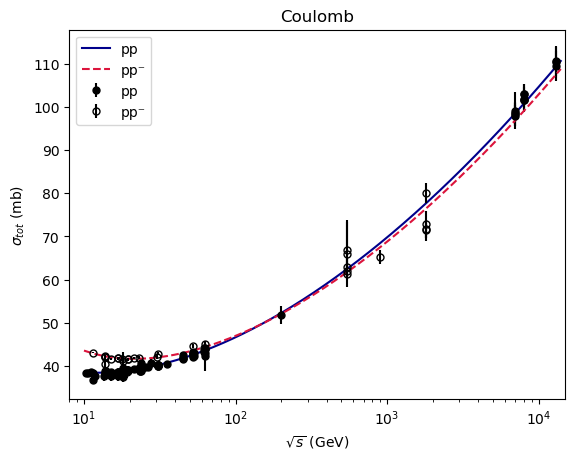

In [31]:
pp = sigPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)
pp_bar = sigPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)

plt.plot(sqrt_s, pp, label='pp', color='darkblue')
plt.errorbar(x_values[0], y_values[0], yerr_values[0], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.plot(sqrt_s,pp_bar, label='pp⁻', color='crimson', linestyle='--')
plt.errorbar(x_values[1], y_values[1], yerr_values[1], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.xlim(8, 15000)
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('$\sigma_{tot}$ (mb)')
plt.title('Coulomb')
plt.savefig('4')
plt.legend()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_703272/385206553.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{s}$ (GeV)')


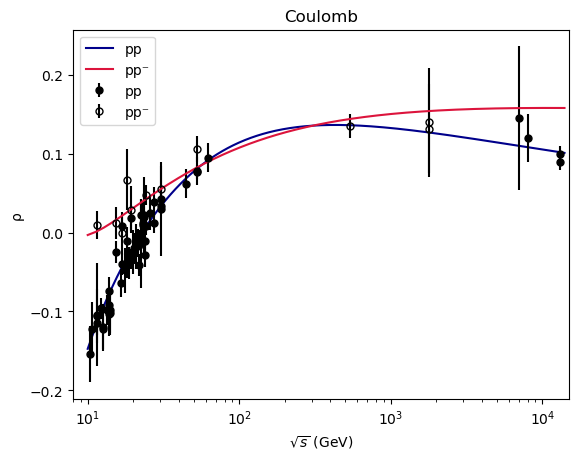

In [32]:
rho_pp = rhoPP(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)
rho_pp_bar = rhoPP_bar(sqrt_s, h1, h2, h3, o1, o2, o3,  arP, arM, CP, CPP, COP, CRP, CRM)

plt.plot(sqrt_s, rho_pp, color='darkblue', label='pp')
plt.errorbar(x_values[2], y_values[2], yerr_values[2], fmt='o', markersize=5, mec='black', mfc='black', color='black', label='pp')
plt.errorbar(x_values[3], y_values[3], yerr_values[3], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='pp⁻')
plt.plot(sqrt_s, rho_pp_bar, color='crimson', label='pp⁻')
plt.xscale('log')
plt.xlabel('$\sqrt{s}$ (GeV)')
plt.ylabel('ρ')
plt.title('Coulomb')
plt.legend()
plt.savefig('5')
plt.xlim(8, 15000)
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_703272/3758675216.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$d\sigma/dt$ (mb/GeV²)')


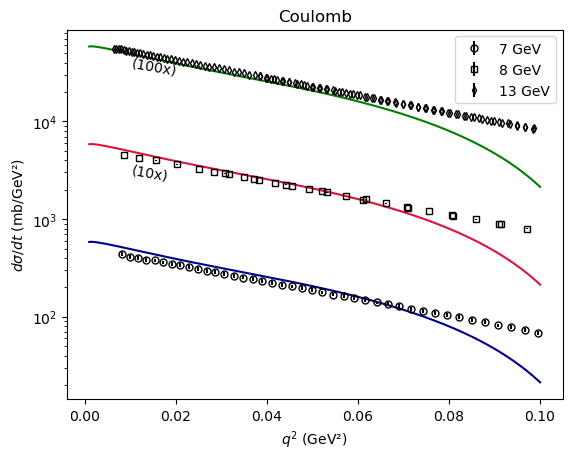

In [33]:
t = np.linspace(0.001, 0.1, 10000)

sig7 = FC7(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
sig8 = FC8(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)
sig13 = FC13(t, h1, h2, h3, b1P, b2P, b3P, b1M, b2M, b3M, kP, kM, o1, o2, o3,  arP, arM, arPP, arOL, aRPM, CP, CPP, COP, CRP, CRM, CRPP, CO, CRPM, betaP, betaRP, betaRM, betaPP, betaRPP, betaO, betaOP, betaRPM)


plt.plot(t, sig7, color='darkblue')
plt.plot(t, 10*sig8, color='crimson')
plt.text(0.01, 10**3+1500, '(10x)', rotation=350)
plt.text(0.01, 10**4+20000, '(100x)', rotation=350)
plt.plot(t, 100*sig13, color='green')
plt.errorbar(x_values[4], y_values[4], yerr_values[4], fmt='o', markersize=5, mec='black', mfc='none', color='black', label='7 GeV')
plt.errorbar(x_values[5], 10*y_values[5], yerr_values[5], fmt='s', markersize=5, mec='black', mfc='none', color='black', label='8 GeV')
plt.errorbar(x_values[6], 100*y_values[6], yerr_values[6], fmt='d', markersize=4, mec='black', mfc='none', color='black', label='13 GeV')
plt.yscale('log')
#plt.xlim(0.005, 0.104)
plt.xlabel('$q^2$ (GeV²) ')
plt.ylabel('$d\sigma/dt$ (mb/GeV²)')
plt.title('Coulomb')
plt.savefig('6')
plt.legend(loc='best')
plt.show()